# CV MIDSEM

## Name : Alli Khadga Jyoth
## Roll.No : 19024
## Dept : DSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage


### Part 1

### Q1

I would take the image at intensity level 8 i.e 256 bits of intensity values. Because the 8 is at the mean of lower and higher intensity levels giving us the average level feature resolution.

### Q5

In [2]:
M = np.array([
    [-2872.0,-1744.3,-138.7,77270.0],
    [-273.9,-174.8,-3287.5,94116.0],
    [-0.7380,-0.6480,-0.1883,75.633]
])

M

array([[-2.8720e+03, -1.7443e+03, -1.3870e+02,  7.7270e+04],
       [-2.7390e+02, -1.7480e+02, -3.2875e+03,  9.4116e+04],
       [-7.3800e-01, -6.4800e-01, -1.8830e-01,  7.5633e+01]])

In [3]:
H = M[:,:3]
h = M[:,3].reshape(3,1)
H_inv = np.linalg.inv(H)
H_inv

array([[-1.11863453e-03, -1.27242826e-04,  3.04548805e+00],
       [ 1.26648610e-03,  2.33839152e-04, -5.01544256e+00],
       [ 2.58592330e-05, -3.06014684e-04,  1.29399794e-02]])

In [4]:
R_T,K_inv = np.linalg.qr(H_inv)
R_T

array([[-0.66192563, -0.13119877,  0.7379982 ],
       [ 0.74941331, -0.13593284,  0.64799842],
       [ 0.01530159,  0.98199244,  0.18829954]])

In [5]:
K_inv

array([[ 1.68997010e-03,  2.54784951e-04, -5.77432805e+00],
       [ 0.00000000e+00, -3.15596422e-04,  2.94906009e-01],
       [ 0.00000000e+00,  0.00000000e+00, -9.99997555e-01]])

In [6]:
K = np.linalg.inv(K_inv)
K = K/K[2,2]
K ,'Intrinsic Martix'

(array([[-5.91724998e+02, -4.77707014e+02,  3.27594359e+03],
        [ 0.00000000e+00,  3.16859598e+03,  9.34440281e+02],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 'Intrinsic Martix')

In [7]:
t = K_inv@h
t

array([[-282.16642284],
       [  -7.39804667],
       [ -75.63281508]])

In [8]:
R_T.T

array([[-0.66192563,  0.74941331,  0.01530159],
       [-0.13119877, -0.13593284,  0.98199244],
       [ 0.7379982 ,  0.64799842,  0.18829954]])

In [9]:
Extensic_matrix = np.array([[-0.66192563,  0.74941331,  0.01530159,t[0,0]],
       [-0.13119877, -0.13593284,  0.98199244,t[1,0]],
       [ 0.7379982 ,  0.64799842,  0.18829954,t[2,0]]])
Extensic_matrix

array([[-6.61925630e-01,  7.49413310e-01,  1.53015900e-02,
        -2.82166423e+02],
       [-1.31198770e-01, -1.35932840e-01,  9.81992440e-01,
        -7.39804667e+00],
       [ 7.37998200e-01,  6.47998420e-01,  1.88299540e-01,
        -7.56328151e+01]])

## Q6

In [10]:
u1 = np.array([4,2,2])
u2 = np.array([6,5,1])
np.cross(u1,u2)

array([-8,  8,  8])

## Q7

In [11]:
M = np.array([[512,-800,0,800],[512,0,-800,1600],[1,0,0,0]])
X = np.array([4,0,0,1]).T
x = M@X
x.reshape(3,-1)

array([[2848],
       [3648],
       [   4]])

## Part 2

(<matplotlib.image.AxesImage at 0x249b1b59430>,
 Text(0.5, 1.0, 'Number of non overlapping objects:46'))

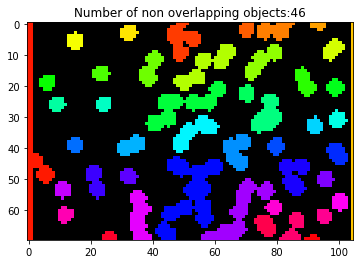

In [31]:
import cv2 as cv
input_image = cv2.imread('Fig2.png')
input_image= cv.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image = cv.threshold(input_image,127,1,cv.THRESH_BINARY)[1]
num_labels, labels = cv2.connectedComponents(input_image,connectivity = 4)
# plt.imshow(labels,'gray'),num_labels

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR) 

# set bg label to black
labeled_img[label_hue==0] = 0
plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)),plt.title(f'Number of non overlapping objects:{num_labels}')
##########################
# THe color is just to show distinction
##########################

In [13]:
import scipy.ndimage as spi

## Q2

(<AxesSubplot:title={'center':'Filled image'}>,
 Text(0.5, 1.0, 'Filled image'))

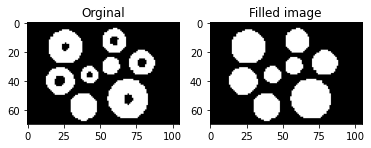

In [14]:
input_image = cv2.imread('Fig1.png')
input_image= cv.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image = cv.threshold(input_image,127,255,cv.THRESH_BINARY)[1]
out = spi.binary_fill_holes(input_image)
plt.subplot(121),plt.imshow(input_image,'gray'),plt.title('Orginal')
plt.subplot(122),plt.imshow(out,'gray'),plt.title('Filled image')

In [15]:
out = out.astype(int)
# out= cv.cvtColor(out,cv2.COLOR_RGB2GRAY)
out = np.array(out)
# out = cv.threshold(out,127,256,cv.THRESH_BINARY)
kernal = np.ones((5,5))
# kernal = kernal/kernal.sum() We dont do that here
erosion = cv.erode(out,kernal,1)
plt.imshow(input_image-erosion,'gray')
plt.subplot(121),plt.imshow(labels,'gray'),plt.title('Orginal')

error: OpenCV(4.5.3) C:/Users/runneradmin/AppData/Local/Temp/pip-req-build-q3d_8t8e/opencv/modules/imgproc/src/morph.simd.hpp:756: error: (-213:The function/feature is not implemented) Unsupported data type (=4) in function 'cv::opt_AVX2::getMorphologyRowFilter'


## Q1

In [26]:
import math

In [30]:
N = 501;
x2 = (N-1)/2;
x1 = -x2
x1 = np.linspace(x2, x1, 501)
x2 = np.linspace(x2, x1, 501)
x,y= np.meshgrid(x1,x2,sparse=True)
# plt.plot(x,y)
# x,y
r = math.hypot(x[0],y[0])

TypeError: only size-1 arrays can be converted to Python scalars

In [22]:
x1 = np.linspace(x2, x1, 501)
x2 = np.linspace(x2, x1, 501) 
x, x = np.meshgrid(x1, x2, sparse=True)  
z = np.sin(xa**2 + xb**2) / (xa**2 + xb**2)  
h = plt.contourf(a,b,z)  
plt.show()  

In [23]:
km = 0.7*np.pi;
rm = x2;
w = rm/10;
term1 = math.sin( (km * r**2) / (2 * rm) );
term2 = 0.5*math.tanh((rm - r)/w) + 0.5;
g = term1 * term2;
I = (g + 1)/2;

NameError: name 'r' is not defined

In [32]:
import math
r = math.hypot(x,y)

TypeError: only size-1 arrays can be converted to Python scalars

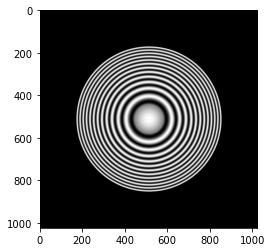

In [40]:
# Using a downloaded zone plate
img = cv.imread('download.dib')
plt.imshow(img)

In [47]:
center = np.array(img.shape[0:2]) / 2
x = center[1] - 250/2
y = center[0] - 250/2

I_cropped = img[int(y):int(y+250), int(x):int(x+250)]


In [48]:
kernal = np.array([[1,1,1],[1,1,1],[1,1,1]])
kernal = kernal/sum(kernal)
img_lpf = cv2.filter2D(I_cropped,-1,kernal)
cv2.imwrite('lpf.jpg',img_lpf)
# plt.imshow()

True

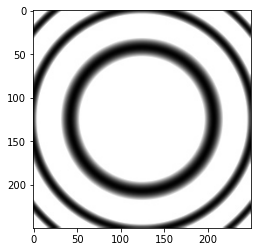

In [49]:
plt.imshow(cv2.imread('lpf.jpg'))